In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1

folder_path = "Data"  #Data, the folder
all_data = pd.DataFrame()

for fname in os.listdir(folder_path):
    if fname.endswith(".csv"):
        # read
        csv_path = os.path.join(folder_path, fname)
        data = pd.read_csv(csv_path)

        company = os.path.splitext(fname)[0]
        
        # mixed with string, float, and number over 1,000. Use lambda
        data['Price'] = data['Price'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)
 
        # adds 'Company'head, turning head into the name.
        data['Company'] = company
        data['Date'] = pd.to_datetime(data['Date'])
        all_data = pd.concat([all_data, data])

#all_data.drop(columns=["Open","High","Low","Vol.","Change %"], inplace=True)
all_data['Company'] = all_data['Company'].apply(lambda x: x.split(' ')[0] 
                                                if x in ['0H4A Historical Data', 'EZJ Historical Data', 
                                                         'IAGl Historical Data', 'JET2 Historical Data']else x)

#all_data.to_csv('all_data.csv', index=False)

pivot = pd.pivot_table(all_data, index='Date', columns='Company', values='Price')
print(pivot)

Company     0H4A      EZJ    IAGl     JET2
Date                                      
2014-01-01   NaN  1349.64  415.80   255.50
2014-02-01   NaN  1448.93  437.70   286.75
2014-03-01   NaN  1443.88  417.00   278.50
2014-04-01   NaN  1378.21  404.00   294.50
2014-05-01   NaN  1288.13  393.40   276.00
...          ...      ...     ...      ...
2023-05-01  9.12   471.30  154.25  1196.00
2023-06-01  9.41   482.60  161.90  1246.00
2023-07-01  9.21   452.30  170.88  1124.00
2023-08-01  8.27   423.20  162.12  1055.00
2023-09-01  7.97   434.10  151.15  1093.00

[117 rows x 4 columns]


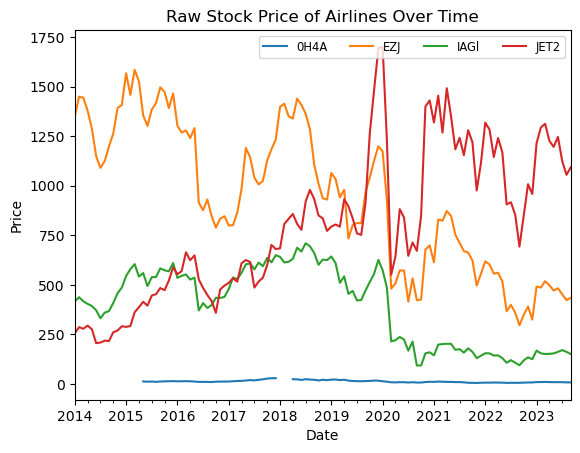

In [60]:
#Q2

pivot.plot()

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Raw Stock Price of Airlines Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=4)
plt.grid(False)
plt.show()


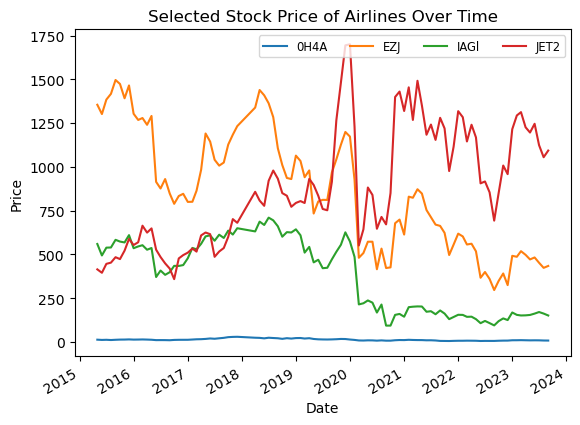

In [61]:
#Q3

cleanpivot = pivot.dropna()
cleanpivot.plot()

cleanpivot_WithLineLost = cleanpivot.resample('M').mean()
#knowing there's a data lost around 2018 for 0H4A
#but leaving a lost in all lines are definitely worse. I'm not doing that.

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Selected Stock Price of Airlines Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=4)
plt.grid(False)
plt.show()


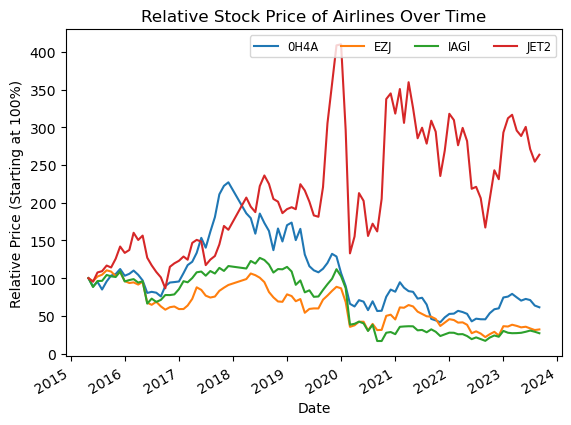

In [62]:
relative_data = pd.DataFrame()


# all companies in the chart should start from the same date. 
# sort to ensure it take the oldest date as 100%
sorted_data = cleanpivot.sort_values(by='Date')

for company in sorted_data.columns:
    relative_price = (sorted_data[company] / sorted_data[company].iloc[0]) * 100
    relative_data[company] = relative_price


relative_data.plot()
plt.xlabel('Date')
plt.ylabel('Relative Price (Starting at 100%)')
plt.title('Relative Stock Price of Airlines Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=4)
plt.grid(False)
plt.show()